### Student Information
Name: 蔡欣曄

Student ID: 112020001

GitHub ID: Newpage927

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [47]:
# Set up
# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
import PAMI
import umap

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [40]:
### Begin Assignment Here
import pandas as pd
df = pd.read_csv("./newdataset/Reddit-stock-sentiment.csv")
X = df[['type','text', 'label', 'sentiment', 'subreddit', 'upvotes']]
# Exercise 1
print('Exercise 1\n')
for i in range(3):
    print(f"example{i+1}\n")
    print("\n".join(df.text[i].split("\n")))
    print("-"*50)
print('\n')

Exercise 1

example1

Calls on retards
--------------------------------------------------
example2

Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
--------------------------------------------------
example3

Seeing lots of red in the ticker.
--------------------------------------------------




In [41]:
# Exercise 2
print('Exercise 2\n')
X['text_length'] = X['text'].str.len() 
target=X[X['text_length'] > 100]
target[:10][['text', 'text_length']]

Exercise 2



C:\Users\User\AppData\Local\Temp\ipykernel_22104\4082207248.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['text_length'] = X['text'].str.len()


,text,text_length
1,Stunt as in like why did they even make a big ...,137
3,Vision Marine Technologies Inc. is rewriting t...,1079
6,Trump will respond to china increasing their t...,295
7,Confirmed not a trap. Its been like this for p...,114
8,Am I the only one seeing the cup & handle brea...,193
13,"\r\nI’ve been doing pretty good with this, but...",258
17,"Exactly this. Trump will blink first because, ...",608
19,I think we are past the numbers. Just assume f...,758
23,"I feel like these HFs took the word ""retard"" t...",172
30,> Still seems like an awful investment\r\n\r\n...,162


In [42]:
# Exercise 3
print('Exercise 3\n')
X[X["type"]=="post"][::10][0:5]

Exercise 3



,type,text,label,sentiment,subreddit,upvotes,text_length
3,post,Vision Marine Technologies Inc. is rewriting t...,1.0,1.0,stockstobuytoday,30,1079
165,post,Stock list generated from technical Analysis. ...,0.0,0.0,stockstobuytoday,1,327
332,post,"Mostly in MSTR calls, AAPL puts and GBTC long.",1.0,1.0,wallstreetbets,5,46
421,post,Stocks that are trending up today\r\n\r\n [Pop...,0.0,0.0,stockstobuytoday,1,68
487,post,"Good Morning Investors, \r\n\r\nI am a young F...",0.0,1.0,stockstobuytoday,9,673


In [43]:
# Exercise 4
print('Exercise 4\n')
X.isnull().apply(lambda x: dmh.check_missing_values(x),axis=1)

Exercise 4



0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
842    (The amoung of missing records is: , 0)
843    (The amoung of missing records is: , 0)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 0)
846    (The amoung of missing records is: , 0)
Length: 847, dtype: object

In [ ]:
#Clear missing data
X.dropna(inplace=True)
X

In [ ]:
# Exercise 7 (draw bar chart)
X.label.value_counts().plot(kind = 'bar',
                                           title = 'label distribution',
                                           ylim = [0, X.label.value_counts().max()+30], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

In [49]:
# Exercise 9 (nltk)
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
analyze = count_vect.build_analyzer()
analyze(X.text[0])


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


['calls', 'on', 'retards']

<Axes: >

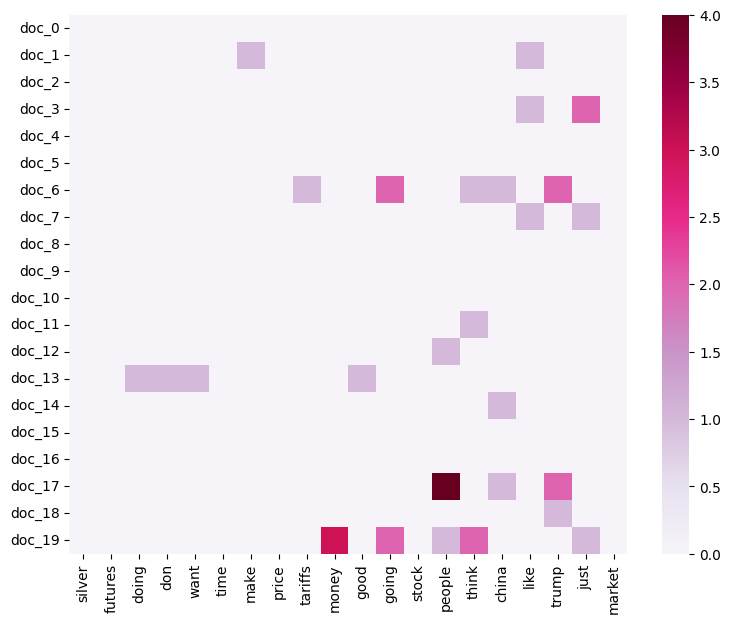

In [53]:
# term heat map
import matplotlib.pyplot as plt
import seaborn as sns
count_vect = CountVectorizer(stop_words='english')
X_counts = count_vect.fit_transform(X.text) 
# count terms frequency
term_sums = X_counts.sum(axis=0).A1
# show top 20 frequency word
top_idx = np.argsort(term_sums)[-20:]          

top_features = np.array(count_vect.get_feature_names_out())[top_idx]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
df_todraw = pd.DataFrame(X_counts[:20, top_idx].toarray(), columns=top_features,index=plot_y)

plt.subplots(figsize=(9, 7))
sns.heatmap(df_todraw, cmap="PuRd", vmin=0)

In [76]:
import pandas as pd
import plotly.express as px
import numpy as np

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
condition = term_frequencies > 10

terms = np.array(count_vect.get_feature_names_out())[condition]
freqs = term_frequencies[condition]

df_plot = pd.DataFrame({'Term': terms, 'Frequency': freqs})

fig = px.bar(
    df_plot,
    x='Term',
    y='Frequency',
    labels={'Term': 'Term', 'Frequency': 'Frequency'},
    title='Terms with Frequency > 10',
)
fig.show()


In [78]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
condition = term_frequencies > 10

terms = np.array(count_vect.get_feature_names_out())[condition]
freqs = term_frequencies[condition]
new_idx = np.argsort(freqs)[::-1]
new_terms = terms[new_idx]
new_freqs = freqs[new_idx]
df_plot = pd.DataFrame({'Term': new_terms, 'Frequency': new_freqs})

fig = px.bar(
    df_plot,
    x='Term',
    y='Frequency',
    labels={'Term': 'Term', 'Frequency': 'Frequency'},
    title='Top Terms with Frequency > 10',
)
fig.show()

In [79]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
condition = term_frequencies > 10

terms = np.array(count_vect.get_feature_names_out())[condition]
freqs = term_frequencies[condition]
term_frequencies_log = np.array([math.log(i) for i in freqs])
new_idx = np.argsort(term_frequencies_log)[::-1]
new_terms = terms[new_idx]
new_freqs = term_frequencies_log[new_idx]
df_plot = pd.DataFrame({'Term': new_terms, 'Frequency': new_freqs})

fig = px.bar(
    df_plot,
    x='Term',
    y='Frequency',
    labels={'Term': 'Term', 'Frequency': 'Frequency'},
    title='Top Terms with Frequency > 10',
)
fig.show()

# Phase 2

In [ ]:
### Begin Assignment Here